C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:36: RuntimeWarning: divide by zero encountered in log10
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:23: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


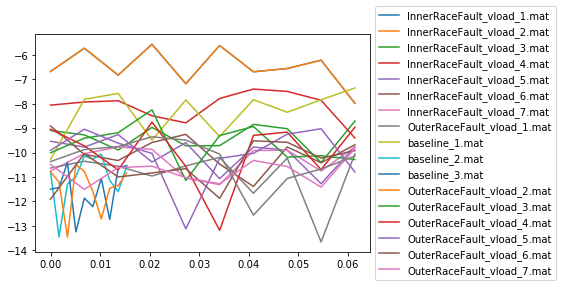

,Feature1,Feature10,Feature11,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9
0,0.043331,0.045963,0.003937,0.045798,0.045798,0.042699,0.054063,0.054063,0.048133,0.048321,0.048321


In [26]:
import pandas as pd
from scipy.io import loadmat
import scipy
from scipy.fftpack import fft
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
import os
file = r'P:\Springboard\Capstone-2\data_out\*.mat'
import glob
legend =[]
data1=defaultdict(list)
for f in glob.glob(file):
    mdata = loadmat(f, mat_dtype=True)



    mdata = mdata['bearing']
    mdtype = mdata.dtype
    #print(mdata)
    ndata = {n: (mdata[n][0, 0]) for n in mdtype.names}
    #print(ndata['load'][0])
    if (ndata['load']) == ['0']:
        vib_data=ndata['gs']
    else:
        vib_data=(ndata['gs']/float(ndata['load'][0]))
    ###WINDOWING+FFT
    from scipy.signal import hamming
    #w = hamming(len(vib_data)/5)
    #if f.split('/') in 'baseline':
    sp = np.fft.rfft(vib_data) * (1 / np.sqrt(len(vib_data)))
    
        #sp = np.fft.fft(2*vib_data) *(1/np.sqrt(len(vib_data)))
    freq = np.fft.fftfreq(len(vib_data))  # time sloth of histogram is 1 hour

    plt.plot(freq[0:10]*1000, np.log10(np.abs(sp)**2 )[0:10])

    legend.append(str(f[35:]))
   
    plt.legend(legend,loc='center left', bbox_to_anchor=(1, 0.5))
    j = 1
    data = {}
    for i in range(0,len(sp),int(len(sp)/10)):
       

        data['Feature'+str(j)] = max(vib_data[i:i+int(len(vib_data)/5)])
        j+=1
    df = pd.DataFrame(data)
    
#df1.to_csv('All.csv',mode='a')

plt.show()
df.head(5)
#print(vib_data)
#Descr STATS
    ####data1[str(f[34:])].append(np.real(sp).T)

#df1 = pd.DataFrame(data1,index=pd.RangeIndex(len(sp)))
#df1.to_csv('All.csv',mode='a')

#FEATURES
   




In [28]:
df.describe()

,Feature1,Feature10,Feature11,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9
count,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
mean,0.043331,0.045963,0.003937,0.045798,0.045798,0.042699,0.054063,0.054063,0.048133,0.048321,0.048321
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.043331,0.045963,0.003937,0.045798,0.045798,0.042699,0.054063,0.054063,0.048133,0.048321,0.048321
25%,0.043331,0.045963,0.003937,0.045798,0.045798,0.042699,0.054063,0.054063,0.048133,0.048321,0.048321
50%,0.043331,0.045963,0.003937,0.045798,0.045798,0.042699,0.054063,0.054063,0.048133,0.048321,0.048321
75%,0.043331,0.045963,0.003937,0.045798,0.045798,0.042699,0.054063,0.054063,0.048133,0.048321,0.048321
max,0.043331,0.045963,0.003937,0.045798,0.045798,0.042699,0.054063,0.054063,0.048133,0.048321,0.048321


In [ ]:
Mean,correlation,Spectral roll-off
Spectral centroid
Spectral flux